# Implementing a forward propagation neural network with numpy

In this notebook, we will implement a forward propagation neural network with numpy. While having access to AI frameworks like TensorFlow and Keras makes it easy to implement neural networks, it is important to understand the underlying mathematics and how it works. This will help us to better understand the inner workings of neural networks and how to debug them. 

This is also very useful for implementing neural networks using PyTorch, which is a framework that does not have a high-level API like TensorFlow and Keras. It's more pythonic and allows us to implement neural networks from scratch, by giving us access to the underlying mathematical operations, similarly to numpy, but with automatic gradient computation and overall better performance.

In [126]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
import logging 
import seaborn as sns
import pandas as pd
import scienceplots
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
plt.style.use('seaborn-v0_8')
#plt.style.use(['science', 'notebook'])
%config InlineBackend.figure_format = 'svg'

In [127]:
W = np.array([
    [1, -3, 5], 
    [2, 4, -6]
])

W.shape

(2, 3)

In [128]:
print(f'w1_1 is: {W[:, 0]}')
print(f'w1_2 is: {W[:, 1]}')
print(f'w1_3 is: {W[:, -1]}')

w1_1 is: [1 2]
w1_2 is: [-3  4]
w1_3 is: [ 5 -6]


In [129]:
b = np.array([-1, 1, 2])
b.shape

(3,)

In [130]:
print(f'b1 is: {b[0]}')
print(f'b2 is: {b[1]}')
print(f'b3 is: {b[2]}')

b1 is: -1
b2 is: 1
b3 is: 2


We will reuse the same coffee roasting dataset as in the tensorflow only implementation. 

## Dataset

In [135]:
# X (T [celsius], t [minutes])
# usual linear interpolation function

def f_wb(X, w, b):
    return np.dot(X, w) + b

# sigmoid function

def g(z):
    return 1/(1 + np.exp(-z))

# dense layer

def dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units) # init activation function of the correct shape
    for j in range(units):
        w = W[:, j]
        z = f_wb(a_in, w) + b[j]
        a_out[j] = g(z)
    return a_out

# sequential network

def sequential(x): 
    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    #a3 = dense(a2, W3, b3)
    #a4 = dense(a3, W4, b4)
    f_x = a2
    return f_x
       [207.08,  14.03],
       [280.6 ,  14.23],
       [202.87,  12.25],
       [196.7 ,  13.54],
       [270.31,  14.6 ],
       [192.95,  15.2 ],
       [213.57,  14.28],
       [164.47,  11.92],
       [177.26,  15.04],
       [241.77,  14.9 ],
       [237.  ,  13.13],
       [219.74,  13.87],
       [266.39,  13.25],
       [270.45,  13.95],
       [261.96,  13.49],
       [243.49,  12.86],
       [220.58,  12.36],
       [163.59,  11.65],
       [244.76,  13.33],
       [271.19,  14.84],
       [201.99,  15.39],
       [229.93,  14.56],
       [204.97,  12.28],
       [173.19,  12.22],
       [231.51,  11.95],
       [152.69,  14.83],
       [163.42,  13.3 ],
       [215.95,  13.98],
       [218.04,  15.25],
       [251.3 ,  13.8 ],
       [233.33,  13.53],
       [280.24,  12.41],
       [243.02,  13.72],
       [155.67,  12.68],
       [275.17,  14.64],
       [151.73,  12.69],
       [151.32,  14.81],
       [164.9 ,  11.73],
       [282.55,  13.28],
       [192.98,  11.7 ],
       [202.6 ,  12.96],
       [220.67,  11.53],
       [169.97,  12.34],
       [209.47,  12.71],
       [232.8 ,  12.64],
       [272.8 ,  15.35],
       [158.02,  12.34],
       [226.01,  14.58],
       [158.64,  12.24],
       [211.66,  14.17],
       [271.95,  14.97],
       [257.16,  11.71],
       [281.85,  13.96],
       [161.63,  12.52],
       [233.8 ,  13.04],
       [210.29,  14.72],
       [261.24,  13.69],
       [256.98,  13.12],
       [281.56,  13.92],
       [280.64,  11.68],
       [269.16,  13.74],
       [246.34,  12.27],
       [224.07,  12.66],
       [164.24,  11.51],
       [272.42,  14.18],
       [177.68,  12.53],
       [212.86,  14.77],
       [165.88,  15.37],
       [277.43,  12.48],
       [236.51,  12.94],
       [244.14,  11.85],
       [213.45,  13.85],
       [234.57,  14.27],
       [270.34,  12.47],
       [170.68,  13.06],
       [226.79,  15.34],
       [245.92,  14.45],
       [281.32,  12.57],
       [185.03,  13.19],
       [189.88,  14.1 ],
       [278.48,  12.11],
       [219.92,  14.21],
       [216.58,  15.15],
       [249.48,  15.03],
       [165.09,  12.28],
       [158.87,  14.82],
       [279.98,  11.56],
       [256.55,  14.41],
       [272.61,  12.58],
       [246.49,  12.45],
       [160.26,  14.48],
       [155.7 ,  14.3 ],
       [188.27,  13.45],
       [270.36,  12.47],
       [213.22,  12.92],
       [175.7 ,  13.39],
       [174.52,  14.7 ],
       [233.  ,  12.63],
       [281.37,  12.88],
       [240.62,  14.43],
       [185.81,  11.55],
       [270.5 ,  15.33],
       [172.98,  12.11],
       [208.41,  13.89],
       [283.51,  15.35],
       [283.36,  12.48],
       [230.85,  13.24],
       [181.24,  11.76],
       [172.78,  12.93],
       [161.88,  12.1 ],
       [156.03,  13.99],
       [216.52,  12.47],
       [221.06,  13.2 ],
       [238.99,  15.23],
       [197.69,  14.08],
       [179.55,  15.26],
       [233.39,  12.13],
       [184.7 ,  12.14],
       [174.18,  12.73],
       [261.11,  13.33],
       [187.42,  13.18],
       [186.1 ,  14.43],
       [157.94,  12.66],
       [193.64,  12.23],
       [249.65,  12.22],
       [190.56,  11.73],
       [252.  ,  12.96],
       [238.55,  12.37],
       [152.94,  12.79],
       [255.17,  14.85],
       [197.09,  14.89],
       [156.8 ,  13.59],
       [184.75,  13.26],
       [179.92,  15.07],
       [190.79,  15.28],
       [164.73,  13.22],
       [209.87,  14.34],
       [196.58,  13.47],
       [159.51,  12.74],
       [247.87,  11.92],
       [212.44,  12.45],
       [172.34,  11.99],
       [259.87,  14.25],
       [201.23,  13.07],
       [248.34,  13.92],
       [273.66,  15.18],
       [215.09,  14.14],
       [223.53,  12.74],
       [211.22,  14.38],
       [224.61,  14.03],
       [215.75,  15.31],
       [254.82,  12.02],
       [259.9 ,  15.17],
       [260.25,  12.87],
       [199.67,  12.47],
       [157.52,  13.39],
       [264.81,  14.58],
       [239.4 ,  14.89],
       [238.98,  12.39],
       [258.43,  12.97],
       [270.16,  12.81],
       [162.41,  14.42],
       [164.53,  14.98],
       [205.61,  14.62],
       [157.1 ,  13.68],
       [241.38,  12.02],
       [232.13,  12.07],
       [191.04,  12.96],
       [233.64,  12.02],
       [174.95,  14.63],
       [246.64,  13.32],
       [188.07,  14.27],
       [213.16,  12.75],
       [268.08,  12.31],
       [258.58,  13.97],
       [237.21,  14.23],
       [251.02,  15.02],
       [274.28,  12.52],
       [172.12,  15.09],
       [177.52,  12.39],
       [258.71,  15.36],
       [264.01,  13.57],
       [200.71,  15.45],
       [249.37,  14.02],
       [151.5 ,  12.28],
       [151.82,  15.13],
       [181.92,  12.18],
       [228.65,  12.31],
       [223.78,  15.3 ],
       [266.63,  12.48],
       [273.68,  13.1 ],
       [220.61,  12.8 ],
       [284.99,  12.73]])

# Outcome given by the taste test 

Y = np.array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [136]:
df_raw = pd.DataFrame({'Temperature': X[:, 0], 'Time': X[:, 1], 'Classification': Y[:, 0]})
df_raw

,Temperature,Time,Classification
0,185.32,12.69,1.0
1,259.92,11.87,0.0
2,231.01,14.41,0.0
3,175.37,11.72,0.0
4,187.12,14.13,1.0
...,...,...,...
195,223.78,15.30,0.0
196,266.63,12.48,0.0
197,273.68,13.10,0.0
198,220.61,12.80,1.0


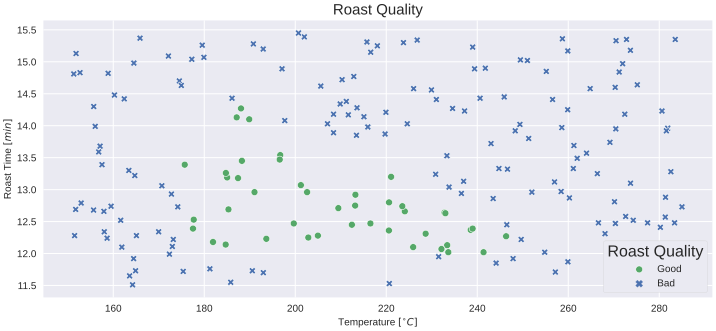

In [137]:
# Visualizing the data points 
fs = 10
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df_raw, x='Temperature', y='Time', style='Classification', markers=['X', 'o'], hue='Classification')
plt.legend(title='Roast Quality', loc='lower right', labels=['Good', 'Bad'], frameon=True, framealpha=1)
plt.xlabel(r'Temperature $[^{\circ}C]$', fontsize=fs)
plt.ylabel(r'Roast Time $[min]$', fontsize=fs)
plt.title('Roast Quality', fontsize=15)
plt.show()

## Normalizing the data 

In [138]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)

print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [139]:
df_norm = pd.DataFrame({'Temperature_normalized': Xn[:, 0], 'Time_normalized': Xn[:, -1], 'Classification': Y[:, 0]})
df_norm

,Temperature_normalized,Time_normalized,Classification
0,-0.834490,-0.656321,1.0
1,1.032307,-1.383054,0.0
2,0.308860,0.868047,0.0
3,-1.083480,-1.515993,0.0
4,-0.789447,0.619894,1.0
...,...,...,...
195,0.127936,1.656819,0.0
196,1.200218,-0.842435,0.0
197,1.376637,-0.292953,0.0
198,0.048610,-0.558832,1.0


Let's ruse the trained weights from the tensorflow only implementation and see if we can get the same results.

In [143]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

In [156]:
# usual linear interpolation function

def f_wb(X, w, b):
    return np.dot(X, w) + b

# sigmoid function

def g(z):
    return 1/(1 + np.exp(-z))

# dense layer

def dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units) # init activation function of the correct shape
    for j in range(units):
        w = W[:, j]
        z = np.dot(w, a_in) + b[j]
        a_out[j] = g(z)
    return a_out

# sequential network

def sequential(x, W1, b1, W2, b2): 
    a1 = dense(x, W1, b1)
    a2 = dense(a1, W2, b2)
    #a3 = dense(a2, W3, b3)
    #a4 = dense(a3, W4, b4)
    f_x = a2
    return f_x

In [157]:
def my_predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    p = np.zeros((m, 1))
    for i in range(m):
        p[i, 0] = sequential(X[i], W1, b1, W2, b2)
    return (p)

Let's try this routine on a couple of examples.

In [158]:
X_tst = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_tstn = norm_l(X_tst)  # remember to normalize
predictions = my_predict(X_tstn, W1_tmp, b1_tmp, W2_tmp, b2_tmp)

yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


## Taking advantage of numpy's vectorization 

Deep learning frameworks are highly optimized for parallel computation, which has become incredibly powerful with the advent of multicore CPUs and GPUs. This is why they are so fast. 

This is also why we can take advantage of numpy's vectorization to speed up our computations, especially in a language like python, whose looping performance is not good at all.

In [160]:
# Inputs need to be Matrices, not 1D arrays

In [159]:
def dense(A_in, W, B):
    Z = np.matmul(A_in, W) + B
    A_out = g(Z)
    return A_out

Notice how the dense layer can be easily implemented with a single matrix multiplication that takes advantage of numpy's vectorization.